This MNIST model: Real data (5200 images) and synthetic images (18067), 
While training time I am adding random 762 images of synthetic data at every 5 epochs, for balancing the datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import matplotlib.pyplot as plt
import sys
import _pickle as cPickle
import gzip
import math
import numpy as np
import os, random
import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
display(tf.__version__)

#Randomly selected Images
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
    numbs = random.sample(range(1,150), sample_count)
    display(labels[34])
    
    # Create a square with can fit {sample_count} images
    grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
    grid_count = min(grid_count, len(images), len(labels))
    
    plt.figure(figsize=(2*grid_count, 2*grid_count))
    for index, value in enumerate(numbs):
        #display(index, value, labels[value])
        plt.subplot(grid_count, grid_count, index+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(images[value]), cmap=plt.cm.gray)
        if(labels[value] == 'Predicted: 300'):
            labels[value] = "Predicted: inf"
        if(labels[value] == 'Predicted: 301'):
            labels[value] = 'Predicted: No Gun'
        #display(labels[i])
        plt.xlabel(labels[value])
      
    plt.show()

'2.7.0'

In [3]:
# # ----------------------------------------------------------------------------------------------------------------------------------------
# load pubgTest
# pubgTestroot = '/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/activeempty_gun/gun_data_preparation/testdata_24x141/'
pubgTestroot = '/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/activeempty_gun/gun_data_preparation/Muhuali_test_cleaned/'
# pubgTestroot = '/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/activeempty_gun/gun_data_preparation/Muhuali_test_images_sel/'

pubgTrainroot = '/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/activeempty_gun/gun_data_preparation/Syntheticdata/'
pubgTrainroot_realDB = '/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/activeempty_gun/gun_data_preparation/Real_cleaned_images/'
# pubgTrainroot_realDB = '/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/activeempty_gun/gun_data_preparation/Realdata/'

Testfilelist= os.listdir(pubgTestroot)

x_test_pubg= np.zeros([len(Testfilelist),14,24,1])
y_test_pubg= np.zeros([len(Testfilelist),1])

display(x_test_pubg.shape,y_test_pubg.shape)

for imgindex in range(len(Testfilelist)):
    imgcrop  = cv2.imread(pubgTestroot+Testfilelist[imgindex],0)
    #display(imgindex,imgcrop.shape)
    
    # imgcropscaled = cv2.resize(imgcrop, (24,14))
    x_test_pubg[imgindex,:,:,0]=imgcrop
    label = Testfilelist[imgindex][0:3]
    #display(label)
    spindex= label.find('_')
    #print(spindex)
    if spindex>0:
        label=label[:spindex]
    y_test_pubg[imgindex,0]= int(label)
    #display('label: {}'.format(int(label)))
    # x_test_pubg[imgindex,:,:,0]= cv2.imread(pubgTestroot+Testfilelist[imgindex],0)
    # y_test_pubg[imgindex,0]= int(Testfilelist[imgindex][0:3])
x_test_pubg=x_test_pubg/255.00

####Training data preparation
filelist= os.listdir(pubgTrainroot)
#np.random.shuffle((filelist))
x_train_pubg= np.zeros([len(filelist),14,24,1])
y_train_pubg= np.zeros([len(filelist),1])
for imgindex in range(len(filelist)):
    x_train_pubg[imgindex,:,:,0]= cv2.imread(pubgTrainroot+filelist[imgindex],0)
    label = filelist[imgindex][0:3]
    spindex= label.find('_')
    #display(label)
    if spindex>0:
        label=label[:spindex]
    y_train_pubg[imgindex,0]= int(label)
    #display('label: {}'.format(int(label)))
x_train_pubg=x_train_pubg/255.00

####Load the real data
filelist_realDB= os.listdir(pubgTrainroot_realDB)
x_train_pubg_realDB= np.zeros([len(filelist_realDB),14,24,1])
y_train_pubg_realDB= np.zeros([len(filelist_realDB),1])
for imgindex in range(len(filelist_realDB)):
    x_train_pubg_realDB[imgindex,:,:,0]= cv2.imread(pubgTrainroot_realDB+filelist_realDB[imgindex],0)
    label = filelist_realDB[imgindex][0:3]
    #display(label)
    spindex= label.find('_')
    if spindex>0:
        label=label[:spindex]
    y_train_pubg_realDB[imgindex,0]= int(label)
    #display('label: {}'.format(int(label)))
x_train_pubg_realDB=x_train_pubg_realDB/255.00

(739, 14, 24, 1)

(739, 1)

In [4]:
print("X_train synthetic shape", x_train_pubg.shape)
print("y_train synthetic shape", y_train_pubg.shape)
print("X_train Real shape", x_train_pubg_realDB.shape)
print("y_train Real shape", y_train_pubg_realDB.shape)
print("X_test original shape", x_test_pubg.shape)
print("y_test original shape", y_test_pubg.shape)

X_train synthetic shape (18066, 14, 24, 1)
y_train synthetic shape (18066, 1)
X_train Real shape (5197, 14, 24, 1)
y_train Real shape (5197, 1)
X_test original shape (739, 14, 24, 1)
y_test original shape (739, 1)


In [5]:
y_test1 = y_test_pubg
y_test1 = list(np.squeeze(y_test1, axis=-1))
# display(y_test1)

In [6]:
# -----------------------------------------------------------------------------
# x_train = x_train/255.0
# x_test = x_test/255.0

# show_sample(x_train, y_train)

num_orientation= 302
# Mnist model -------------------
# Define the model architecture
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(14, 20,1)),
    # keras.layers.Dense(128, activation=tf.nn.relu),

# Optional: You can replace the dense layer above with the convolution layers below to get higher accuracy.
    # keras.layers.Reshape(target_shape=( 14, 20, 1)),    
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation=tf.nn.relu, input_shape = (14, 24, 1), name='input'),
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(input_shape=(14, 24)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_orientation, name='output')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 12, 22, 16)        160       
                                                                 
 conv2d (Conv2D)             (None, 10, 20, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 10, 16)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 10, 16)         0         
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                51264     
                                                        

In [7]:
print(x_train_pubg.shape,y_train_pubg.shape)
# print(y_train_pubg)

(18066, 14, 24, 1) (18066, 1)


In [8]:
testaccset = []
testaccset_top = []
stp = 0
slos = 0
nn = 500
all_acc = np.zeros(nn*5)*np.nan
all_los = np.zeros(nn*5)*np.nan
for k in range(nn):
    num_random_sample = len(x_train_pubg_realDB)
    random_index = np.random.choice(np.arange(len(x_train_pubg)), 3*num_random_sample)
    
    train_random_y = y_train_pubg[random_index,:]
    train_random_x = x_train_pubg[random_index,:,:,:]
    
    temp_data_x = np.concatenate((train_random_x, x_train_pubg_realDB), axis=0)
    temp_data_y = np.concatenate((train_random_y, y_train_pubg_realDB), axis=0)
    #print("X_train synthetic shape", temp_data_x.shape)
    #print("y_train synthetic shape", temp_data_y.shape)

    index_shuffle = np.arange(temp_data_y.shape[0])
    np.random.shuffle(index_shuffle[:])
    
    temp_data_x = temp_data_x[index_shuffle[:],:,:,:]
    temp_data_y = temp_data_y[index_shuffle[:],:]
    
    training_history = model.fit(temp_data_x, temp_data_y, batch_size=1024, epochs=5)
    #training_history = model.fit(x_train_pubg, y_train_pubg, batch_size=1024, epochs=5,validation_split=0.2)
    test_loss, test_acc = model.evaluate(x_test_pubg, y_test_pubg)
    testaccset.append(test_acc)
    
    etp = stp + 5
    all_acc[stp:etp] = training_history.history['accuracy']
    
    elos = slos + 5
    all_los[slos:elos] = training_history.history['loss']
    
    stp = etp
    slos = elos
    
    if test_acc > 0.99:
        display(k)
        break
        
# model.save('./CODSpeedChkpnt_Feb18')
    

Epoch 1/5
21/21 [==============================] - 2s 46ms/step - loss: 5.7013 - accuracy: 0.0085
Epoch 2/5
21/21 [==============================] - 1s 46ms/step - loss: 5.6484 - accuracy: 0.0141
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 5.5097 - accuracy: 0.0181
Epoch 4/5
21/21 [==============================] - 1s 45ms/step - loss: 5.3282 - accuracy: 0.0278
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 3.5647 - accuracy: 0.0257
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 4.9931 - accuracy: 0.0542
Epoch 2/5
21/21 [==============================] - 1s 45ms/step - loss: 4.7743 - accuracy: 0.0709
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 4.5525 - accuracy: 0.0904
Epoch 4/5
21/21 [==============================] - 1s 37ms/step - loss: 4.3017 - accuracy: 0.1119
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 2.7379 - accuracy: 0.2571
Epoch 1/5
21/21 [=====

21/21 [==============================] - 1s 44ms/step - loss: 0.7027 - accuracy: 0.7805
Epoch 4/5
21/21 [==============================] - 1s 45ms/step - loss: 0.7111 - accuracy: 0.7773
Epoch 5/5
24/24 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.9093
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 0.7190 - accuracy: 0.7748
Epoch 2/5
21/21 [==============================] - 1s 44ms/step - loss: 0.6863 - accuracy: 0.7841
Epoch 3/5
21/21 [==============================] - 1s 46ms/step - loss: 0.6927 - accuracy: 0.7812
Epoch 4/5
21/21 [==============================] - 1s 44ms/step - loss: 0.6850 - accuracy: 0.7851
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.9215
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 0.6956 - accuracy: 0.7851
Epoch 2/5
21/21 [==============================] - 1s 45ms/step - loss: 0.6667 - accuracy: 0.7897
Epoch 3/5
21/21 [===============

21/21 [==============================] - 1s 44ms/step - loss: 0.5363 - accuracy: 0.8305
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.9283
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 0.5521 - accuracy: 0.8226
Epoch 2/5
21/21 [==============================] - 1s 46ms/step - loss: 0.5434 - accuracy: 0.8258
Epoch 3/5
21/21 [==============================] - 1s 44ms/step - loss: 0.5321 - accuracy: 0.8317
Epoch 4/5
21/21 [==============================] - 1s 45ms/step - loss: 0.5281 - accuracy: 0.8289
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.2866 - accuracy: 0.9337
Epoch 1/5
21/21 [==============================] - 1s 45ms/step - loss: 0.5336 - accuracy: 0.8303
Epoch 2/5
21/21 [==============================] - 1s 45ms/step - loss: 0.5329 - accuracy: 0.8262
Epoch 3/5
21/21 [==============================] - 1s 38ms/step - loss: 0.5214 - accuracy: 0.8330
Epoch 4/5
21/21 [===============

24/24 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9486
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3971 - accuracy: 0.8716
Epoch 2/5
21/21 [==============================] - 1s 46ms/step - loss: 0.3859 - accuracy: 0.8740
Epoch 3/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3924 - accuracy: 0.8758
Epoch 4/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3889 - accuracy: 0.8726
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9432
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3924 - accuracy: 0.8748
Epoch 2/5
21/21 [==============================] - 1s 46ms/step - loss: 0.3828 - accuracy: 0.8738
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 0.3880 - accuracy: 0.8754
Epoch 4/5
21/21 [==============================] - 1s 38ms/step - loss: 0.3737 - accuracy: 0.8748
Epoch 5/5
24/24 [===============

21/21 [==============================] - 1s 44ms/step - loss: 0.3044 - accuracy: 0.9012
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 0.2999 - accuracy: 0.9038
Epoch 4/5
21/21 [==============================] - 1s 45ms/step - loss: 0.3044 - accuracy: 0.9002
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9567
Epoch 1/5
21/21 [==============================] - 1s 41ms/step - loss: 0.3236 - accuracy: 0.8944
Epoch 2/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3071 - accuracy: 0.8986
Epoch 3/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3086 - accuracy: 0.8989
Epoch 4/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3045 - accuracy: 0.8991
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.9594
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 0.3060 - accuracy: 0.8994
Epoch 2/5
21/21 [===============

21/21 [==============================] - 1s 45ms/step - loss: 0.2610 - accuracy: 0.9161
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9743
Epoch 1/5
21/21 [==============================] - 1s 44ms/step - loss: 0.2742 - accuracy: 0.9086
Epoch 2/5
21/21 [==============================] - 1s 44ms/step - loss: 0.2690 - accuracy: 0.9105
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 0.2663 - accuracy: 0.9124
Epoch 4/5
21/21 [==============================] - 1s 44ms/step - loss: 0.2593 - accuracy: 0.9137
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9662
Epoch 1/5
21/21 [==============================] - 1s 41ms/step - loss: 0.2574 - accuracy: 0.9139
Epoch 2/5
21/21 [==============================] - 1s 46ms/step - loss: 0.2610 - accuracy: 0.9138
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 0.2567 - accuracy: 0.9136
Epoch 4/5
21/21 [===============

24/24 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 0.9865
Epoch 1/5
21/21 [==============================] - 1s 37ms/step - loss: 0.2470 - accuracy: 0.9177
Epoch 2/5
21/21 [==============================] - 1s 44ms/step - loss: 0.2350 - accuracy: 0.9219
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 0.2325 - accuracy: 0.9227
Epoch 4/5
21/21 [==============================] - 1s 44ms/step - loss: 0.2268 - accuracy: 0.9257
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9878
Epoch 1/5
21/21 [==============================] - 1s 43ms/step - loss: 0.2338 - accuracy: 0.9202
Epoch 2/5
21/21 [==============================] - 1s 44ms/step - loss: 0.2438 - accuracy: 0.9189
Epoch 3/5
21/21 [==============================] - 1s 45ms/step - loss: 0.2402 - accuracy: 0.9195
Epoch 4/5
21/21 [==============================] - 1s 44ms/step - loss: 0.2283 - accuracy: 0.9217
Epoch 5/5
24/24 [===============

166

24/24 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.9905


'Predicted: 5'

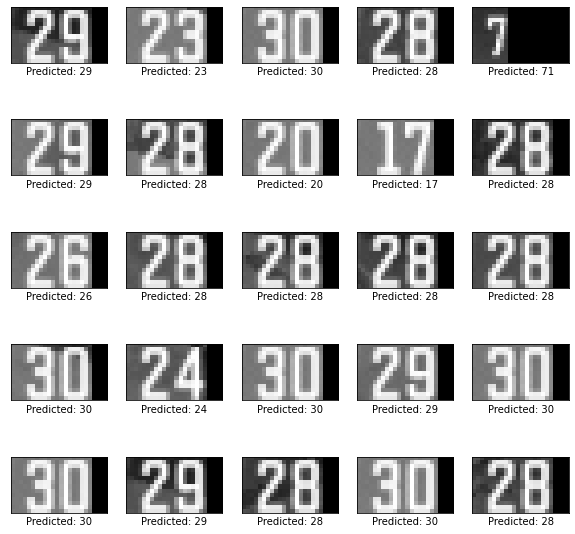

In [9]:
# # model evaluation predict pubg images ---------

test_loss, test_acc = model.evaluate(x_test_pubg, y_test_pubg)
predictions_pubg = model.predict(x_test_pubg)
show_sample(x_test_pubg,['Predicted: %d' % (np.argmax(result)) for result in predictions_pubg])

# test_loss, test_acc = model.evaluate(x_train_pubg, y_train_pubg)
# predictions_pubg = model.predict(x_train_pubg)
# show_sample(x_train_pubg,['Predicted: %d' % (np.argmax(result)) for result in predictions_pubg])

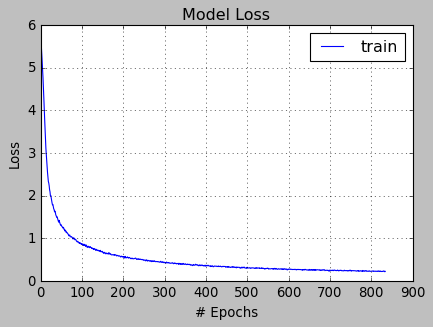

In [10]:
# Draw Model Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(all_acc)
# plt.plot(range(epoch),training_history.history['val_accuracy'])
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
plt.style.use(['classic'])

# Draw Model Loss
plt.figure(1,figsize=(6,4))
plt.plot(all_los)
# plt.plot(range(epoch),training_history.history['loss'])
# plt.plot(range(epoch),training_history.history['val_loss'])
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(['train','validation'])

#### Review the prediction results

In [11]:
predictions_pubg = model.predict(x_test_pubg)
print(len(predictions_pubg))
pred_label = [np.argmax(i) for i in predictions_pubg]
# print(pred_label,y_test_pubg)

# identify correctly and incorrectly classified clothing items

correctly_classified = []
incorrectly_classified = []
index = 0
for actual, predict in zip(y_test_pubg, pred_label):
    if actual == predict:
        correctly_classified.append(index)
    else:
        incorrectly_classified.append(index)
    index += 1

ccc = len(correctly_classified)
icc = len(incorrectly_classified)
print('Correctly classified bullet number  : {:5d} ({:=5.2f} %)'.format(ccc, ccc * 100 / (ccc + icc)))    
print('Incorrectly classified bullet number: {:5d} ({:=5.2f} %)'.format(icc, icc * 100 / (ccc + icc)))    

739
Correctly classified bullet number  :   732 (99.05 %)
Incorrectly classified bullet number:     7 ( 0.95 %)


In [12]:
print(incorrectly_classified)

[30, 246, 248, 440, 566, 621, 700]


##### Incorrect predictions

7 1 7


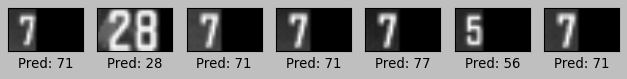

In [13]:
npts = len(incorrectly_classified)
if(npts <=8):
    nrows = 1
    nn = npts
    ncolmns = nn
if(npts >8):
    nextra = npts%4
    nn = npts - nextra
    nrows = nn//4
    ncolmns = 4

print(nn,nrows,ncolmns)
fig = plt.figure()
for i in range(nn):
    indx = incorrectly_classified[i]
    labl = pred_label[indx]
    plt.subplot(nrows, ncolmns, i+1)
    plt.imshow(x_test_pubg[indx].squeeze(), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Pred: {}".format(labl))
plt.tight_layout()   

##### Predictions list

In [14]:
import pandas as pd

actuals = (y_test1)
predictions = (pred_label)
actuals = [int(i) for i in actuals]

act_pred = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
act_pred.to_csv('/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/speed_Detection/gun_bullet_num_pred.csv', index=False)

In [15]:
dff = pd.read_csv("/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/speed_Detection/gun_bullet_num_pred.csv")
dff

Actual  Predictions
0        20           20
1        28           28
2        28           28
3        28           28
4        30           30
..      ...          ...
734      20           20
735       2            2
736      28           28
737       3            3
738      30           30

[739 rows x 2 columns]

In [16]:
def bad_clmns1(row):
    highlight = 'background-color: lightcoral;'
    default = ''
    
    if(row['Actual'] != row['Predictions']):
        return [highlight, highlight]
    else:
        return [default, default]
    
dff.style.apply(bad_clmns1, subset = ['Actual', 'Predictions'], axis=1)

# dff.to_csv('/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/speed_Detection/gun_bullet_num_predc.csv', index=False)

In [17]:
npts = len(y_test_pubg)
for ii in range(npts):
    if(actuals[ii] != predictions[ii]):
        print(actuals[ii],predictions[ii])

7 71
30 28
7 71
7 71
7 77
5 56
7 71
